In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-03 13:15:22.713759: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 13:15:22.751131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 13:15:23.277510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Caran_uca_art_e_Guaiamum_art = pd.DataFrame(df[['Ano','Guaiamum_art','Caran_uca_art']])

dados = df_Caran_uca_art_e_Guaiamum_art[['Ano','Guaiamum_art','Caran_uca_art']].dropna().reset_index(drop=True)


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Guaiamum_art'] = dados.loc[i,'Guaiamum_art'] / dados.loc[i,'Caran_uca_art']



prop = dados['Prop_Guaiamum_art'].values
dados.head()

,Ano,Guaiamum_art,Caran_uca_art,Prop_Guaiamum_art
0,1984,4.0,60.0,0.066667
1,1985,4.0,54.0,0.074074
2,1986,3.0,42.0,0.071429
3,1987,5.0,57.0,0.087719
4,1988,3.0,64.0,0.046875


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [5]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=100, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Guaiamum_art/pesos prop Guaiamum_art/.weights.h5', overwrite=True)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0138
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9796
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9681
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9561
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9440
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9320
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9201
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9105
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9027
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8971
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8933
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8914
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8901
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8893
Epoch 16/100
1/1 ━━━━

In [6]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Guaiamum_art/pesos prop Guaiamum_art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.06945053]
 [0.07205524]
 [0.07543077]
 [0.08105194]
 [0.08770851]
 [0.09524221]
 [0.10413519]
 [0.11279285]
 [0.12116399]
 [0.12890044]
 [0.13604805]
 [0.14391886]
 [0.15148386]
 [0.15824798]
 [0.1635294 ]
 [0.16749826]
 [0.17026217]
 [0.17443322]
 [0.17864776]
 [0.18252791]
 [0.18564524]
 [0.18597797]
 [0.18493474]
 [0.1825662 ]
 [0.17853303]
 [0.17142068]]


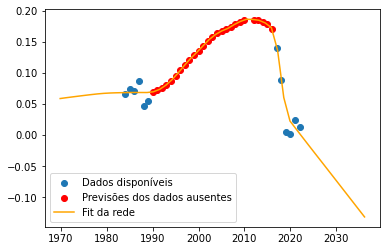

In [7]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

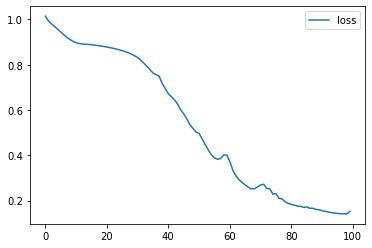

In [8]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [9]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Caran_uca_art
df_prev_Caran_uca_art = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Caran_uca_art/Interpolações Caran_uca_art.xlsx')

df_preenchido = df[['Ano','Guaiamum_art']]
for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Guaiamum_art']=df_prev_Caran_uca_art.loc[i,'Caran_uca_art']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Guaiamum_art/Previsão Guaiamum_art.xlsx')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
     Ano  Guaiamum_art
0   1950     13.493805
1   1951     12.745990
2   1952     11.957654
3   1953     10.591589
4   1954      9.394421
5   1955     11.059953
6   1956      8.008832
7   1957      5.840932
8   1958      7.325020
9   1959     11.205256
10  1960      6.481044
11  1961      4.609896
12  1962      8.774690
13  1963     10.666373
14  1964      5.999266
15  1965      8.014672
16  1966      6.680359
17  1967      9.038918
18  1968      7.108449
19  1969      5.665401
20  1970      4.312318
21  1971      3.001448
22  1972      1.896783
23  1973      1.090835
24  1974      0.849273
25  1975      1.001046
26  1976      1.421431
27  1977      2.095826
28  1978      1.953955
29  1979      2.811801
30  1980      2.293987
31  1981      2.372152
32  1982      3.129728
33  1983      4.774928
34  1984      4.101653
35  1985      3.698966
36  1986      2.879200
37  1987      3.906159
38  1988      4.384373
39  1989      2.466320
40  1990      3.332